**MACHINE LEARNING END TO END MODELING**

END TO END ML BASED LEARNING
1. Data collection/importing
2. EDA(Exploratory Data Analysis)
3. Preprocessing
4. Data Processing
5. Model Selection and training
6. Testing the model/Evaluation
7. Deploye the model(devops)

**DATA COLLECTION/IMPORTING**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/placement-dataset.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# **EDA**

In [2]:
# checking if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [5]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [6]:
df.shape

(100, 4)

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [8]:
print(df.duplicated().sum())

0


In [9]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


<Axes: >

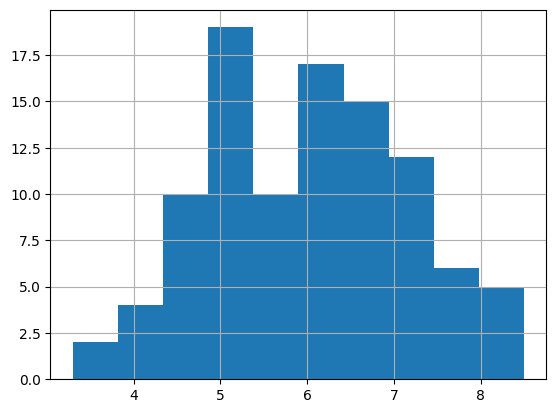

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram shows the weigntage of each value in the chosen column
df['cgpa'].hist(bins=10)

<Axes: xlabel='placement', ylabel='cgpa'>

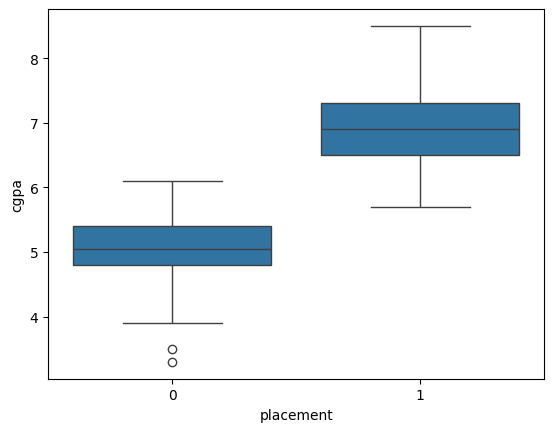

In [11]:
# Boxplot : showa max, min and median
sns.boxplot(x='placement', y='cgpa', data=df)

<Axes: xlabel='cgpa', ylabel='iq'>

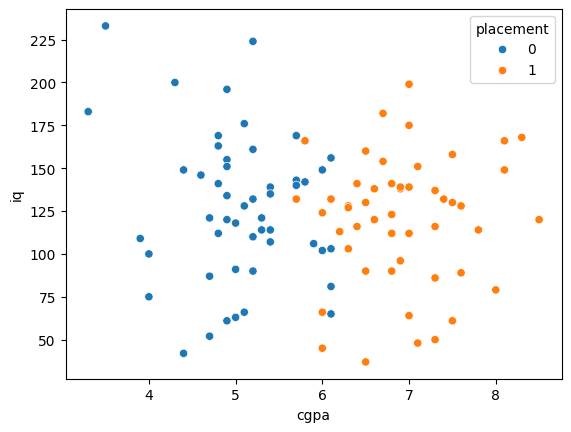

In [12]:
#seaborn liibrary used to plot dot graph in 1 d plain
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=df)

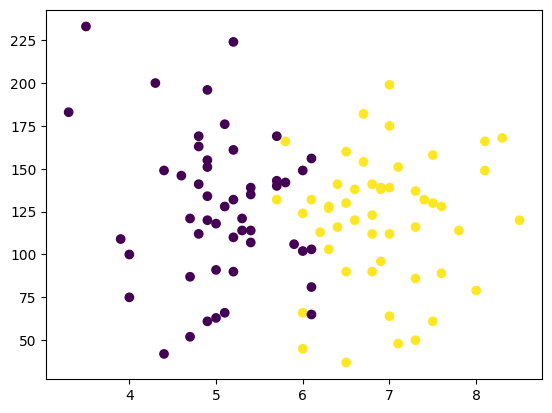

In [13]:
#same graph using matplotlib
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

<Axes: >

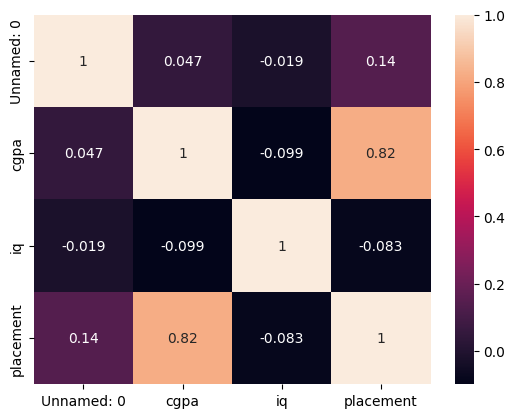

In [14]:
#deals in mathamatical numeric reltion between two variables
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='placement', ylabel='count'>

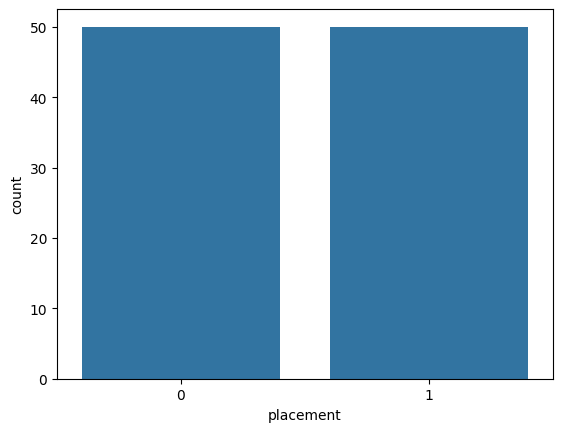

In [15]:
df['placement'].value_counts()
sns.countplot(x='placement', data=df)

# **PREPROCESSING**

In [16]:
#    all row\  /1 to all column (we are removing the extra colum)
df = df.iloc[:,1:]

In [17]:
# delete rows with null values
df_clean = df.dropna(asix=0)

TypeError: DataFrame.dropna() got an unexpected keyword argument 'asix'

In [18]:
# delete columns with null values
df_clean = df.dropna(axis=1)

In [19]:
#replace null values  with mean
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())
df['iq'] = df['iq'].fillna(df['iq'].mean())

In [20]:
# remove duplicate values
df = df.drop_duplicates()

**DATA PROCESSING**

In [21]:
#used when values are not in scalable ratio

#StandardScaler → subtract mean, divide by standard deviation (Z-score normalization)
#MinMaxScaler → scales values to [0,1] 0 se leke 1 tak

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['cgpa', 'iq']] = scaler.fit_transform(df[['cgpa', 'iq']])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#seperating INPUT and OUTPUT COLUNS
X = df[['cgpa', 'iq']]
y = df['placement']
#Spliting into test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# **MODEL SELECTION AND TRAINING**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lor= LogisticRegression()
lor.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = lor.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [28]:
df.head()

,cgpa,iq,placement
0,0.710958,-0.014593,1
1,-0.079972,-0.442331,0
2,-0.607258,-0.064915,0
3,1.238245,0.211856,1
4,-0.167853,0.463466,0


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

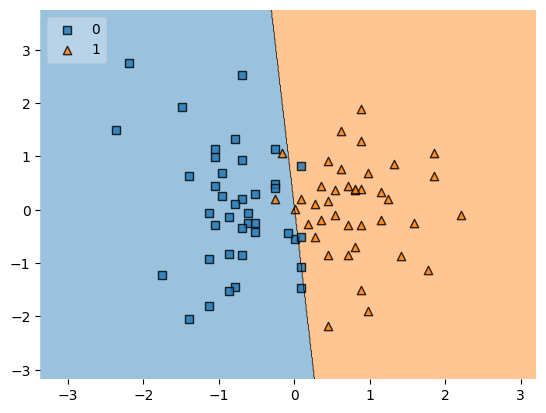

In [30]:
#mlxtend library to see the decision boundary or region or pattern
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train.values, y_train.values, clf=lor, legend=2)

**DEPLOYE THE MODEL**

In [31]:
import pickle #convert model to a file that can be deployed

In [32]:
pickle.dump(lor, open('model.pkl', 'wb'))
#wb stands for write binarty